# Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta parte do Projeto Prático diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

Os 2 TOPs 3 Sem Atributos Categóricos - 15 Iterações em Cada Modelo <p>
    <img src = "https://github.com/delrickOliveira/rna_2021_2.2/blob/main/img/Imagem1-SAT.png?raw=true"></img> <p>
    <img src = "https://github.com/delrickOliveira/rna_2021_2.2/blob/main/img/Imagem2-SAT.png?raw=true"></img> <p>
    <p> 15 REPETIÇÕES <P>

In [27]:
data_all = pd.read_csv('data/covtype.csv')
# Elimine todas as colunas relativas aos atributos categóricos
categoricos = list(filter(lambda x: (x.startswith('Wilderness_Area') or x.startswith('Soil_Type')), data_all.columns.to_list()))
data = data_all.drop(categoricos, axis=1)
X = data.iloc[:, :(data.shape[1] - 1)]
y = data.iloc[:, -1:]

X = np.array(X)
y = np.array(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [29]:
hiperparams = {'solver': ['adam'],
                   'batch_size': [1000],
                   'learning_rate_init': [0.001, 0.01],
                   'max_iter': [350],
                   'n_iter_no_change': [10]}

scores = {'F-Score': make_scorer(f1_score , average='weighted'),
          'Accuracy': make_scorer(accuracy_score)}

In [30]:
def gridsearch(architecture):

    #Escalonamento dos atributos
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

    model_gs = MLPClassifier(hidden_layer_sizes=architecture[0], activation=architecture[1])
    clf = GridSearchCV(model_gs, hiperparams, scoring=scores, n_jobs=-1, refit='F-Score', cv=5, verbose=160)
    clf.fit(X_train_std, y_train)

    return clf

In [31]:
print("")
print("GridSearch...")
print("")

clf1 = gridsearch([(15,15), 'relu'])



GridSearch...

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [36]:
print("-----Arquitetura 1---------")
print("([(15,15), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf1.best_params_)
print("\nMedia F1-Score")
print(clf1.best_score_)

-----Arquitetura 1---------
([(15,15), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.001, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7230186134140594


In [32]:
clf4 = gridsearch([(34,), 'relu'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [37]:
print("-----Arquitetura 2---------")
print("([(34,), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf4.best_params_)
print("\nMedia F1-Score")
print(clf4.best_score_)

-----Arquitetura 2---------
([(34,), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.01, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7279188737056288


In [33]:
clf5 = gridsearch([(28,), 'relu'])


Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [38]:
print("-----Arquitetura 4---------")
print("([(28,), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf5.best_params_)
print("\nMedia F1-Score")
print(clf5.best_score_)

-----Arquitetura 4---------
([(28,), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.01, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7180377665344146


In [35]:
clf6 = gridsearch([(23,), 'relu'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [39]:
print("-----Arquitetura 3---------")
print("([(23,), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf6.best_params_)
print("\nMedia F1-Score")
print(clf6.best_score_)

-----Arquitetura 3---------
([(23,), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.01, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7153785748743549


## Top 6 Arquiteturas com Atributos Categóricos

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csv/covtype.csv')
# Elimine todas as colunas relativas aos atributos categóricos
# categoricos = list(filter(lambda x: (x.startswith('Wilderness_Area') or x.startswith('Soil_Type')), data_all.columns.to_list()))
# data = data_all.drop(categoricos, axis=1)
X = data.iloc[:, :(data.shape[1] - 1)]
y = data.iloc[:, -1:]



X = np.array(X)
y = np.array(y)

In [ ]:
print("")
print("GridSearch...")
print("")

clf1 = gridsearch([(15,15), 'relu'])


In [ ]:
print("-----Arquitetura 1---------")
print("([(15,15), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf1.best_params_)
print("\nMedia F1-Score")
print(clf1.best_score_)

-----Arquitetura 1---------
([(15,15), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.01, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7199636256690877


In [ ]:
clf4 = gridsearch([(34,), 'relu'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print("-----Arquitetura 2---------")
print("([(34,), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf4.best_params_)
print("\nMedia F1-Score")
print(clf4.best_score_)

-----Arquitetura 2---------
([(34,), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.001, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7253857928393421


In [ ]:
clf6 = gridsearch([(23,), 'relu'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("-----Arquitetura 3---------")
print("([(23,), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf6.best_params_)
print("\nMedia F1-Score")
print(clf6.best_score_)

-----Arquitetura 3---------
([(23,), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.001, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7147586620721607


In [ ]:
clf5 = gridsearch([(28,), 'relu'])


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print("-----Arquitetura 4---------")
print("([(28,), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf5.best_params_)
print("\nMedia F1-Score")
print(clf5.best_score_)

-----Arquitetura 4---------
([(28,), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.001, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7222001020330407


## Identificando a mellhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

In [ ]:
print("-----Arquitetura 2 sem atributos categóricos")
print("([(34,), 'relu'])\n")
print("Melhor Optmização de Hiperparâmetros")
print(clf4.best_params_)
print("\nMedia F1-Score")
print(clf4.best_score_)

-----Arquitetura 2---------
([(34,), 'relu'])

Melhor Optmização de Hiperparâmetros
{'batch_size': 1024, 'learning_rate_init': 0.01, 'max_iter': 350, 'n_iter_no_change': 10, 'solver': 'adam'}

Media F1-Score
0.7279188737056288


In [40]:
for i in range(5):
  print("Fold "+str(i+1))
  fs = 'split'+str(i)+'_test_F-Score'
  ac = 'split'+str(i)+'_test_Accuracy'
  print("F-Score = "+str(clf4.cv_results_[fs][0]))
  print("Acurácia = "+str(clf4.cv_results_['split0_test_Accuracy'][0])+"\n")

Fold 1
F-Score = 0.7282438147322401
Acurácia = 0.7375648496471687

Fold 2
F-Score = 0.7189156187488602
Acurácia = 0.7375648496471687

Fold 3
F-Score = 0.728388611264044
Acurácia = 0.7375648496471687

Fold 4
F-Score = 0.7221260052790185
Acurácia = 0.7375648496471687

Fold 5
F-Score = 0.7217297875209784
Acurácia = 0.7375648496471687



## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [43]:


data_all = pd.read_csv('data/covtype.csv')
# Elimine todas as colunas relativas aos atributos categóricos
categoricos = list(filter(lambda x: (x.startswith('Wilderness_Area') or x.startswith('Soil_Type')), data_all.columns.to_list()))
data = data_all.drop(categoricos, axis=1)
X = data.iloc[:, :(data.shape[1] - 1)]
y = data.iloc[:, -1:]

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = True)

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [48]:
hiperparams = {'solver': ['adam'],
                   'batch_size': [1024],
                   'learning_rate_init': [0.01],
                   'max_iter': [500],
                   'n_iter_no_change': [10]}

scores = {'F-Score': make_scorer(f1_score , average='weighted'),
          'Accuracy': make_scorer(accuracy_score)}


In [49]:
def gridsearch(architecture):

    #Escalonamento dos atributos
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

    model_gs = MLPClassifier(hidden_layer_sizes=architecture[0], activation=architecture[1])
    clf = GridSearchCV(model_gs, hiperparams, scoring=scores, n_jobs=-1, refit='F-Score', cv=5, verbose=160)
    clf.fit(X_train_std, y_train)

    return clf

In [50]:
best_network = gridsearch([(34,), 'relu'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [52]:
filename = 'bestnetwork.sav'
pickle.dump(best_network, open(filename, 'wb'))

In [53]:
def load_cfl():
    pickled_best_network = pickle.load(open('bestnetwork.sav', 'rb'))
    return pickled_best_network



In [54]:
load_best_cfl =  load_cfl()

In [57]:
y_pred =  load_best_cfl.predict(X_test_std)


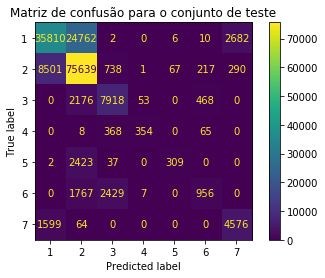

In [59]:
matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Matriz de confusão para o conjunto de teste')
plt.show(matrix)
plt.show()

In [60]:
print('Acurácia:', accuracy_score(y_pred, y_test))
print('F1-Score:', f1_score(y_pred,y_test, average='weighted'))
print('Precisão:', precision_score(y_pred, y_test, average='weighted'))
print('Revocação:', recall_score(y_pred, y_test, average='weighted'))

Acurácia: 0.7203621259408849
F1-Score: 0.7355258372779251
Precisão: 0.7756982284441815
Revocação: 0.7203621259408849


In [ ]:
hiperparams = {'solver': ['adam'],
                   'batch_size': [1024],
                   'learning_rate_init': [0.01],
                   'max_iter': [60],
                   'n_iter_no_change': [10]}

scores = {'F-Score': make_scorer(f1_score , average='weighted'),
          'Accuracy': make_scorer(accuracy_score)}


In [ ]:
brute_force = gridsearch([(260,260), 'relu'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/borgesbsb/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/borgesbsb/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


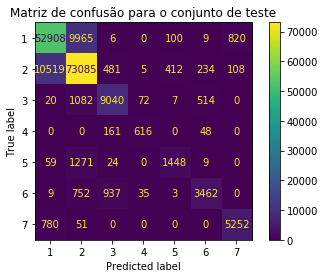

In [ ]:
y_pred =  brute_force.predict(X_test_std)
matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Matriz de confusão para o conjunto de teste')
plt.show(matrix)
plt.show()


In [ ]:
print('Acurácia:', accuracy_score(y_pred, y_test))
print('F1-Score:', f1_score(y_pred,y_test, average='weighted'))
print('Precisão:', precision_score(y_pred, y_test, average='weighted'))
print('Revocação:', recall_score(y_pred, y_test, average='weighted'))

Acurácia: 0.8365327244354691
F1-Score: 0.8374401369328
Precisão: 0.8392214267085112
Revocação: 0.8365327244354691
